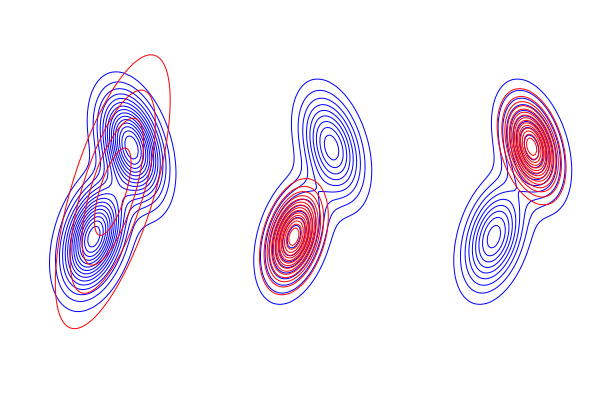

In [1]:
using Distributions
using Plots

mu = [-1  -1
       1   1]

Sigma = zeros(2, 2, 2)
Sigma[:, :, 1] = [1 / 2    1 / 4
                  1 / 4      1  ]
Sigma[:, :, 2] = [1 / 2   -1 / 4
                -1 / 4       1  ]
SigmaKL = [3   2
           2   3]

x1 = [i for i in -4:0.1:4]'
x2 = x1

n1 = size(x1)[2]
n2 = size(x2)[2]

f1 = zeros(n1, n2)
f2 = zeros(n1, n2)
klf = zeros(n1, n2)
kll = zeros(n1, n2)
klr = zeros(n1, n2)

for i in 1:n1
    x_tile = repeat([x1[i]], 81)
    x_final = [x_tile x2']
    d1 = MvNormal(mu[1, :], Sigma[:, :, 1])
    f1[i, :] = pdf(d1, x_final')
    d2 = MvNormal(mu[2, :], Sigma[:, :, 2])
    f2[i, :] = pdf(d2, x_final')
    dklf = MvNormal([0;0], SigmaKL)
    klf[i, :] = pdf(dklf, x_final')
    dkll = MvNormal(mu[1, :], Sigma[:, :, 1] * 0.6)
    kll[i, :] = pdf(dkll, x_final')
    dklr = MvNormal(mu[2, :], Sigma[:, :, 2] * 0.6)
    klr[i, :] = pdf(dklr, x_final')
end

f = f1 + f2

plots = [klf, kll, klr]

gr()
p1 = contour(x1', x2', f, color=:blue, grid=false, showaxis=false, legend=false)
p1 = contour!(x1', x2', plots[1], color=:red)
p2 = contour(x1', x2', f, color=:blue, grid=false, showaxis=false, legend=false)
p2 = contour!(x1', x2', plots[2], color=:red)
p3 = contour(x1', x2', f, color=:blue, grid=false, showaxis=false, legend=false)
p3 = contour!(x1', x2', plots[3], color=:red)
l = @layout [a b c]
plot(p1, p2, p3, layout=l)
savefig("klfwdzrevmixgauss.pdf")
plot!()                    